<a href="https://colab.research.google.com/github/yzhang486/Neural_Signals_and_Computation_yzhan486_GitHUB/blob/main/yzhan486_main_exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Google Drive for accessing data files

In [ ]:
### Link to google drive
from google.colab import drive
drive.mount('/content/drive')
import os
### "My Drive" by default, otherwise please change the directory to the one that contains TIF images
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [ ]:
## INSTALL jpca, this code block creates jpca folder and build inside the google drive.
# If you are able to run the following block importing jPCA functions, please ignore this installation block
!git clone https://github.com/bantin/jPCA.git
os.chdir("/content/drive/My Drive/jPCA")
!pip install .

Cloning into 'jPCA'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 127 (delta 68), reused 91 (delta 36), pack-reused 0
Receiving objects: 100% (127/127), 770.10 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (68/68), done.
Processing /content/drive/My Drive/jPCA
  Preparing metadata (setup.py) ... done
  Created wheel for jPCA: filename=jPCA-0.0.1-py3-none-any.whl size=8663 sha256=2c64ee940369666065cbb02d1b8de8f46955becf5248cc5d66a0a52d69f146d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-25jook5t/wheels/ce/35/26/99813617a0e8722ad70119db0029f17589a812b282c27c9984
Successfully built jPCA


In [ ]:
## Import jPCA functions
import jPCA
from jPCA.util import load_churchland_data, plot_projections

In [ ]:
### Clone GITHUB of yzhan486 to access the code
import os
!git clone https://github.com/yzhang486/Neural_Signals_and_Computation_yzhan486_GitHUB.git
os.chdir('Neural_Signals_and_Computation_yzhan486_GitHUB')

Cloning into 'Neural_Signals_and_Computation_yzhan486_GitHUB'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 201 (delta 78), reused 103 (delta 57), pack-reused 65
Receiving objects: 100% (201/201), 8.36 MiB | 6.82 MiB/s, done.
Resolving deltas: 100% (112/112), done.


##Problem 1 Importance of likelihood selection



In [ ]:
## Load functions for problem 1
%run yzhan486_problem1_ex_2.py

<ipython-input-8-31b4ad456a23>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r_samples_diff_x[i] = poisson(lambda_diff)


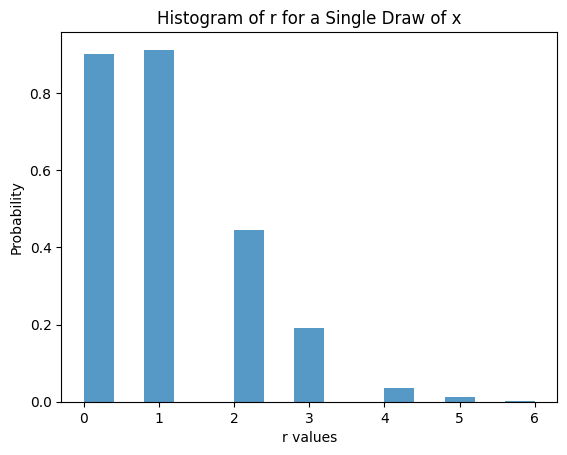

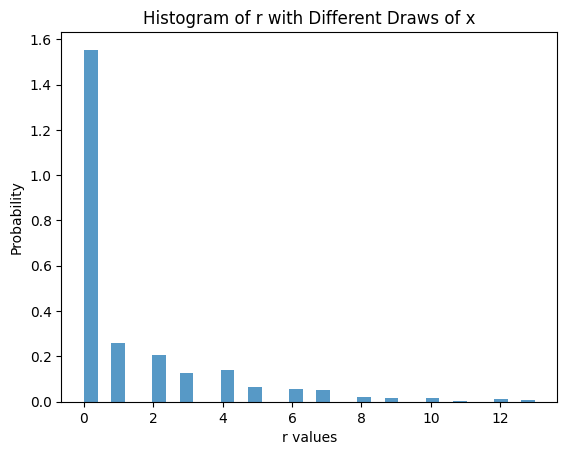

In [ ]:
## Problem 1 Part A
# Define the number of elements in the tuning curve
N = 100

# Define the tuning curve g
g = gausswin(N, 5) * np.cos(2 * np.pi * np.arange(N) / 10)

# Initialize the number of samples for the histograms
num_samples = 1000

# Scenario 1: Single draw of x, multiple samples of r|x
X_single = 2 * np.random.rand(N, 1)  # Generate one random vector x
lambda_single = np.exp(g.T @ X_single)  # Compute lambda = <g, x>
r_samples_fixed_x = np.random.poisson(lambda_single, num_samples)

# Plot histogram for fixed x
plt.figure()
plt.hist(r_samples_fixed_x, bins='auto', density=True, alpha=0.75)
plt.title('Histogram of r for a Single Draw of x')
plt.xlabel('r values')
plt.ylabel('Probability')

# Scenario 2: Different x for each sample of r
r_samples_diff_x = np.zeros(num_samples)
for i in range(num_samples):
    X_diff = 2 * np.random.rand(N, 1)  # Generate a different random vector x each time
    lambda_diff = np.dot(g.T, X_diff).clip(min=1e-10)
    r_samples_diff_x[i] = poisson(lambda_diff)

# Plot histogram for different x
plt.figure()
plt.hist(r_samples_diff_x, bins='auto', density=True, alpha=0.75)
plt.title('Histogram of r with Different Draws of x')
plt.xlabel('r values')
plt.ylabel('Probability')
plt.show()

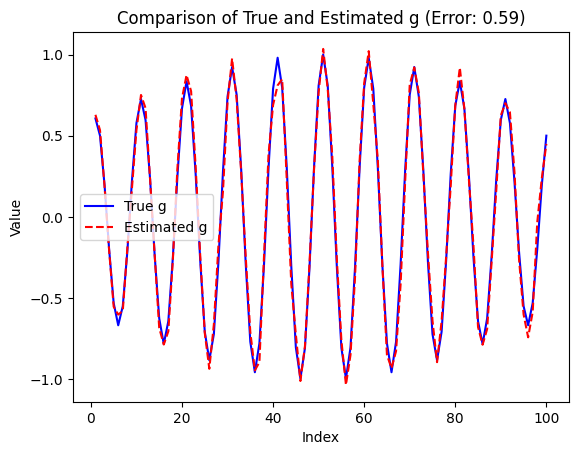

Norm of the estimation error: 0.59


In [ ]:
## PART B

# Define the number of elements in each stimulus
N = 100
# Define the number of stimuli
M = 200
# Define the tuning curve g
g = custom_gausswin(N, 5)
# Generate M different stimuli
X = 2 * np.random.rand(N, M)  # Matrix X, each column is a stimulus vector
# Define noise variance
sigma2 = 0.1

# Generate responses r = X'g + noise
r = X.T @ g + normal(0, np.sqrt(sigma2), M)

# Maximum Likelihood Estimation of g using least squares
# Solving the normal equations X'Xg = X'r
g_hat = np.linalg.pinv(X @ X.T) @ (X @ r)

# Compute the norm of the error
error = np.linalg.norm(g - g_hat)

# Plot true and estimated g
plt.figure()
plt.plot(np.arange(1, N+1), g, 'b-', label='True g')
plt.plot(np.arange(1, N+1), g_hat, 'r--', label='Estimated g')
plt.legend()
plt.title(f'Comparison of True and Estimated g (Error: {error:.2f})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Print the norm of the error
print(f'Norm of the estimation error: {error:.2f}')


##Part B observation:
the closness of the estimated g depends on M value selection. When M = 100, the fitting result is not good, with an error of 11.61; however, when M = 200, error decreased to 0.53 and the estimated g becomes very close to real g.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -132605.962818
         Iterations: 278
         Function evaluations: 32825
         Gradient evaluations: 325


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -929088.976379
         Iterations: 692
         Function evaluations: 73932
         Gradient evaluations: 732


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -7835.466688
         Iterations: 95
         Function evaluations: 11918
         Gradient evaluations: 118


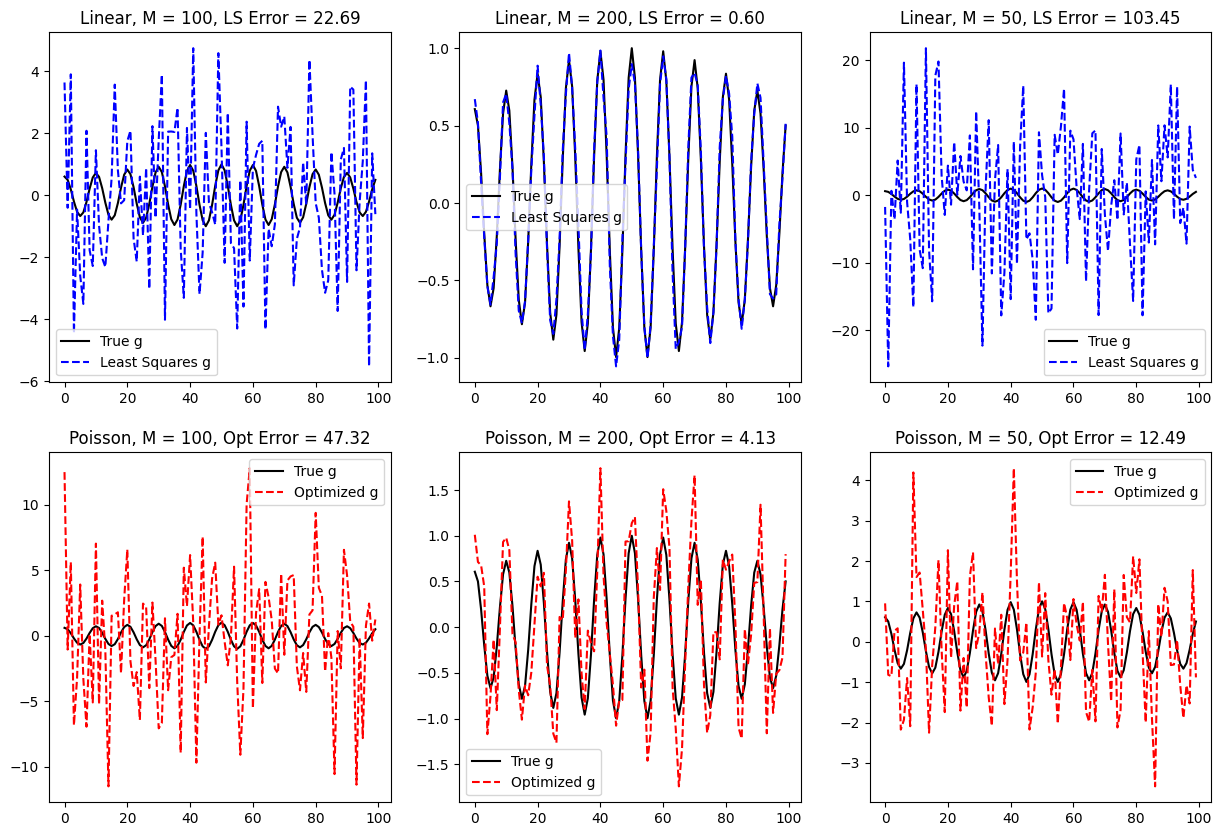

In [ ]:
## PART C
# Parameters
N = 100  # Dimension of each stimulus
M_values = [N, 2*N, int(N/2)]
sigma = 0.1  # Standard deviation of Gaussian noise

# Generate the tuning curve g
g_true = custom_gausswin(N, 5)

# Initialize storage for estimates and errors
g_estimates = np.zeros((N, len(M_values)))
g_ls_collect = np.zeros((N, len(M_values)))
error_likelihood = np.zeros(3)
error_ls = np.zeros(3)



# Optimization for each M
for i, M in enumerate(M_values):
    # Generate a matrix X of random stimuli
    X = 2 * np.random.rand(N, M)

    # Generate Gaussian responses
    r = X.T @ g_true + normal(0, np.sqrt(sigma), M)
    # Generate Poisson responses
    lambd = np.exp(X.T @ g_true)
    responses = poisson(lambd)

    # Least squares estimation
    g_ls = np.linalg.solve(X @ X.T, X @ r)
    g_ls_collect[:, i] = g_ls
    error_ls[i] = np.linalg.norm(g_true - g_ls)

    # Optimization using minimize from scipy
    result = minimize(negLogLikelihood, np.zeros(N), args=(X, responses),
                  method='BFGS', options={'disp': True, 'maxiter': 1000, 'gtol': 1e-6})
    g_est = result.x
    g_estimates[:, i] = g_est
    error_likelihood[i] = np.linalg.norm(g_true - g_est)

# Plotting results
fig, axs = plt.subplots(2, len(M_values), figsize=(15, 10))
for i in range(len(M_values)):
    axs[0, i].plot(g_true, 'k', label='True g')
    axs[0, i].plot(g_ls_collect[:, i], 'b--', label='Least Squares g')
    axs[0, i].set_title(f'Linear, M = {M_values[i]}, LS Error = {error_ls[i]:.2f}')
    axs[0, i].legend()

    axs[1, i].plot(g_true, 'k', label='True g')
    axs[1, i].plot(g_estimates[:, i], 'r--', label='Optimized g')
    axs[1, i].set_title(f'Poisson, M = {M_values[i]}, Opt Error = {error_likelihood[i]:.2f}')
    axs[1, i].legend()

plt.show()

## Answer for part C
Similar to observations in part b, the estimates get closer to real data when the sample size is increased; estimation error was significantly decreased when sample size is bigger. So M = 2N has the best result.
When M = 200, possion estimator has higher estimation error than linear estimator.

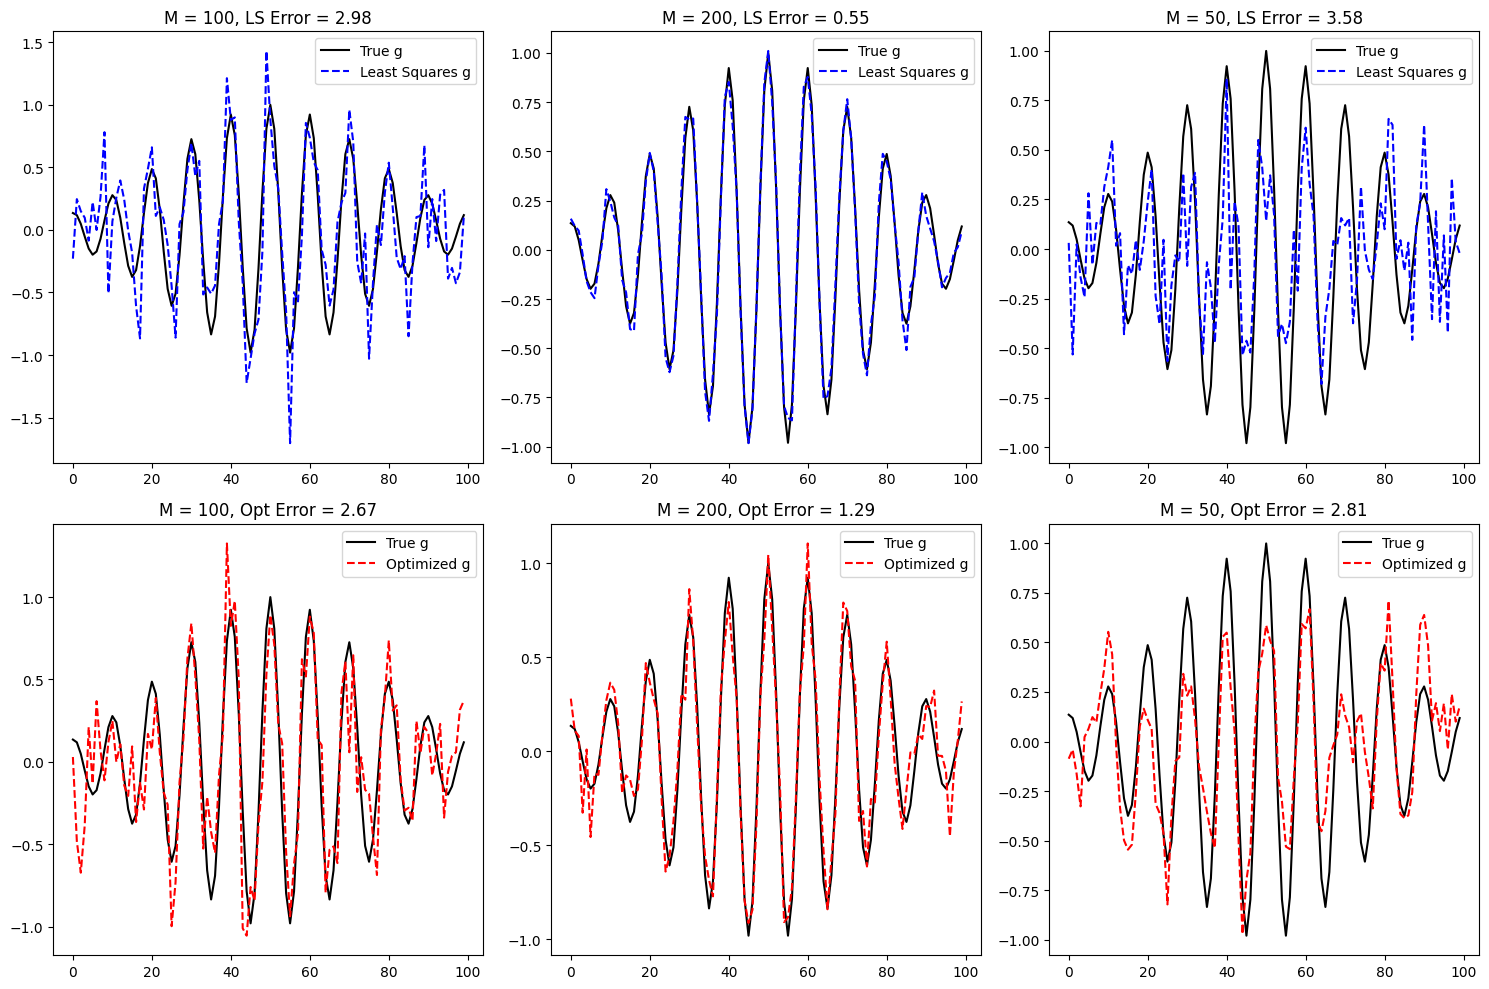

In [ ]:
### PART D
# Parameters
N = 100
M_values = [N, 2*N, int(N/2)]
sigma = 0.1
sigma_g = 1

# Generate the tuning curve g
g_true = custom_gausswin(N)

# Data structures for storing results
g_estimates = np.zeros((N, len(M_values)))
g_ls_collect = np.zeros((N, len(M_values)))
error_likelihood = np.zeros(3)
error_ls = np.zeros(3)


# Optimization setup
for i, M in enumerate(M_values):
    X = 2 * np.random.rand(N, M)
    r = X.T @ g_true + normal(0, np.sqrt(sigma), M)
    lambda_ = np.exp(X.T @ g_true)
    response = poisson(lambda_)

    # Least squares estimate with regularization
    g_map = np.linalg.inv(X @ X.T + (sigma**2/sigma_g**2) * np.eye(N)) @ (X @ r)
    g_ls_collect[:, i] = g_map
    error_ls[i] = norm(g_true - g_map)

    # Optimizing the negative log posterior
    result = minimize(negLogPosterior, np.zeros(N), args=(X, response, sigma_g), method='L-BFGS-B')
    g_est = result.x
    g_estimates[:, i] = g_est
    error_likelihood[i] = norm(g_true - g_est)

# Plotting results
fig, axs = plt.subplots(2, len(M_values), figsize=(15, 10))
for i in range(len(M_values)):
    axs[0, i].plot(g_true, 'k', label='True g')
    axs[0, i].plot(g_ls_collect[:, i], 'b--', label='Least Squares g')
    axs[0, i].set_title(f'M = {M_values[i]}, LS Error = {error_ls[i]:.2f}')
    axs[0, i].legend()

    axs[1, i].plot(g_true, 'k', label='True g')
    axs[1, i].plot(g_estimates[:, i], 'r--', label='Optimized g')
    axs[1, i].set_title(f'M = {M_values[i]}, Opt Error = {error_likelihood[i]:.2f}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

## Answer for part D

After adding in prior knowledge, I realized that the estimator performance is not as sensitive to sample size as in the cases without prior knowledge. Also, adding prior knowledge lead to significantly reduced optimization error in both linear and poisson cases.

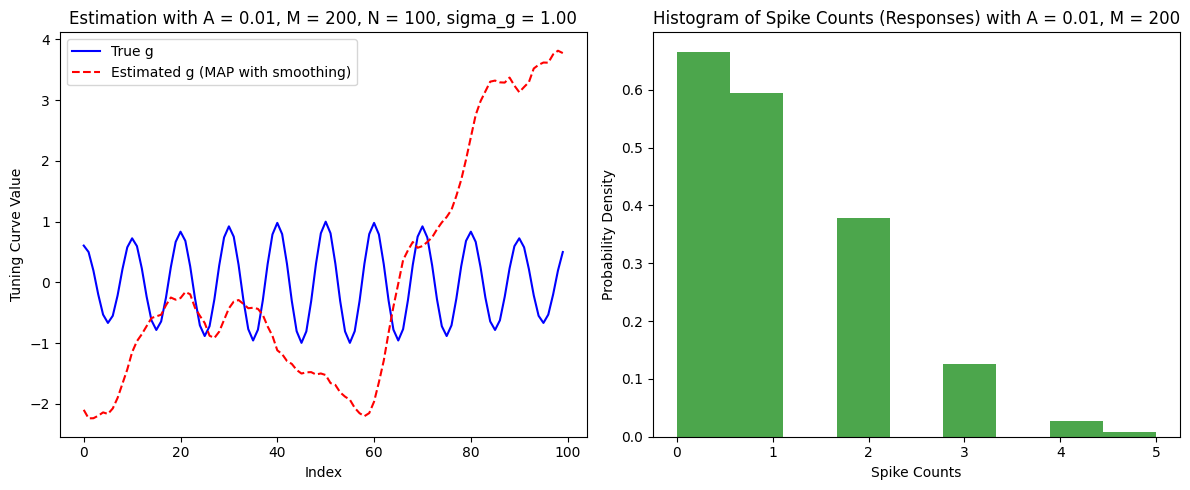

In [ ]:
### PART E
# function experiment_with_parameters already loaded
# Call the function with low stimulus strength
experiment_with_parameters(100, 200, 0.01, 1)


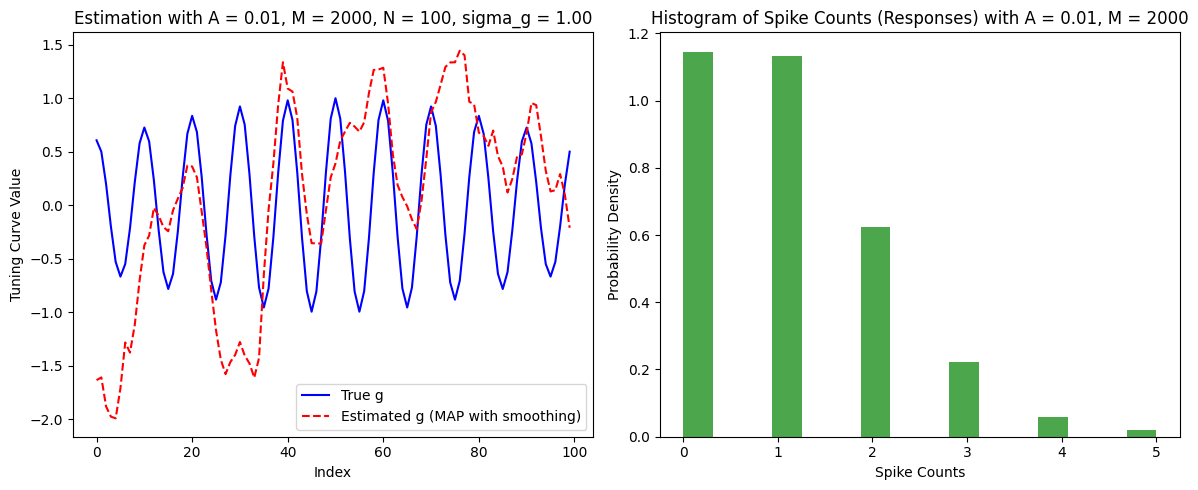

In [ ]:
# Call the function with an increased number of samples
experiment_with_parameters(100, 2000, 0.01, 1)

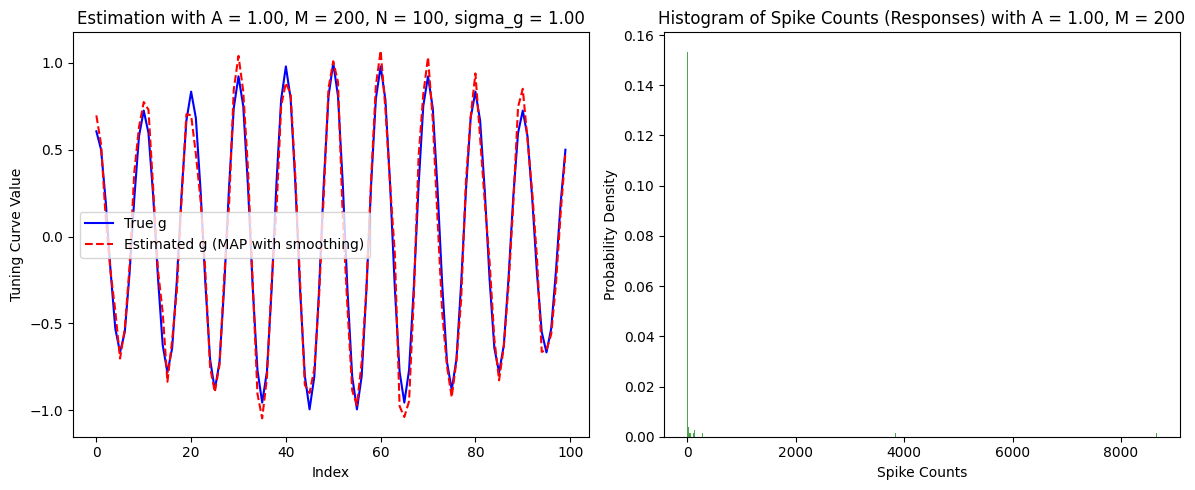

In [ ]:
# Call the function with normal stimulus strength
experiment_with_parameters(100, 200, 1, 1)

## Observation for Part E

When the stimulus strength is low, the estimated tuning curve diverges significantly from the true values. The smoothing prior helps reduce overfitting, but at a very low signal, regularization cannot help the accuracy.
The histogram of spike counts shows that most responses are zero, so that it shows that low stimulus strength leads to poor neural activity.

When the sample size is increased, the tuning curve improves, and histogram is skewed towards low spike counts, similar to the first experiment.

When the stimulus strength is normal, the extimated tuning curve matches the true curve closely, and smoothing prior helps in maintaining smoothness well. The histogram shows spreaded different values.

To summarize, increasing the sample size and simulus strength improve the turning curve estimate; smoothing prior helps prevent overfitting.

## Problem 2
Please see yzhan486_problem_2_ex_2.m in MATLAB

## Problem 3

In [ ]:
## Load functions of problem 3
%run yzhan486_problem3_ex_2.py

<Figure size 640x480 with 0 Axes>

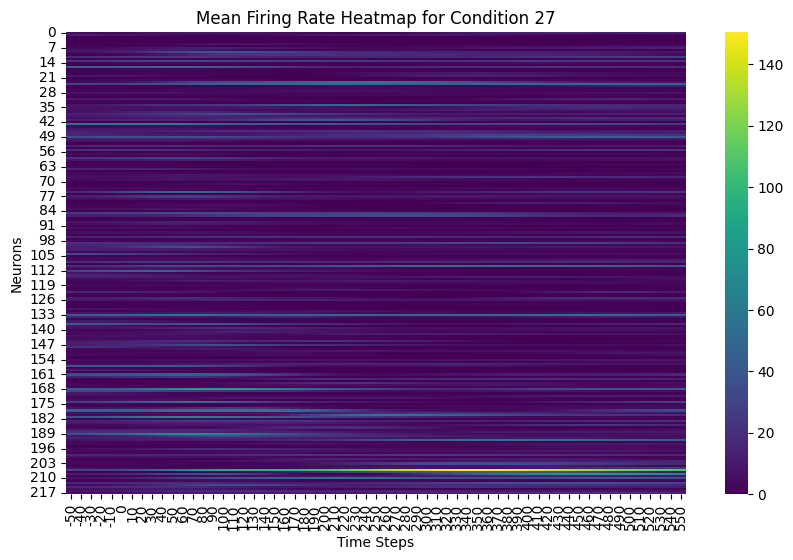

In [ ]:
## Part A
# Load publicly available data from Mark Churchland's group
data_path = '/content/drive/MyDrive/exampleData.mat'  # By default, the exampleData.mat should be stored in MyDrive directly
datas, times = load_churchland_data(data_path)
# Identify condition 27
condition_index = 26  # this is condition 27
matrix_A = datas[condition_index].T
time_27 = times
# Plot the data as a heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(matrix_A, cmap='coolwarm', cbar_kws={'label': 'Mean Firing Rate (Hz)'})
sns.heatmap(matrix_A, cmap='viridis', cbar=True, xticklabels=time_27)
plt.title('Mean Firing Rate Heatmap for Condition 27')
plt.xlabel('Time Steps')
plt.ylabel('Neurons')
plt.show()


### PART A Answer
The matrix values represent the average firing rates of each neuron over time, providing insight into neural activity patterns for "Condition 27."

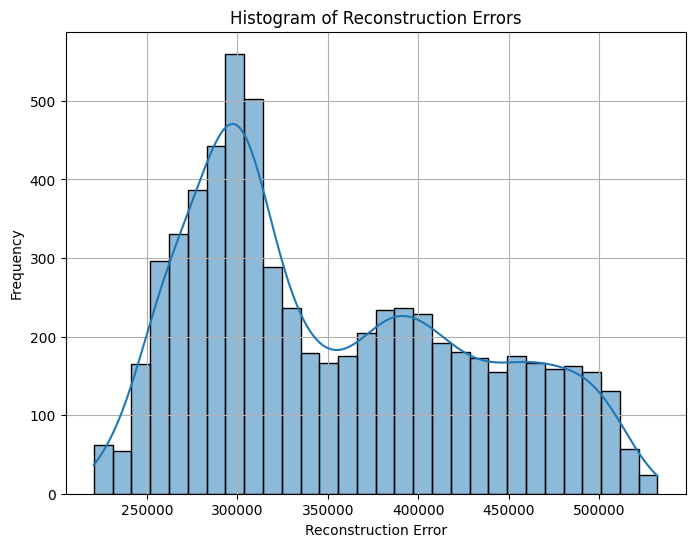

In [ ]:
## Part B
# Load the jPCA dataset
data_path = '/content/drive/MyDrive/exampleData.mat'  # Update this path accordingly
mat_data = loadmat(data_path)
data = mat_data['Data']

# Extract all datasets as lists of matrices
datasets = [mat_data['Data'][0][i][0] for i in range(data.shape[1])] #Collect all the matrices A
# datasets has a length of 108, each element being (61,218)
times_list = [mat_data['Data'][0][i][1].flatten() for i in range(data.shape[1])]#Collect all the time data
# times has a length of 108, each element being the time data being (61,)

# Estimate matrix A using the jPCA dataset
A_estimated = estimate_A(datasets, times_list)

# Reconstruct data and compute reconstruction errors
errors = []
for dataset, times in zip(datasets, times_list):
    dt = compute_time_steps(times)
    X_t = dataset[:-1, :]
    X_t1_real = dataset[1:, :]
    X_t1_pred = predict_next_state(X_t, A_estimated, dt)
    errors.extend(np.linalg.norm(X_t1_pred - X_t1_real, axis=1))

# Plot the histogram of reconstruction errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Histogram of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

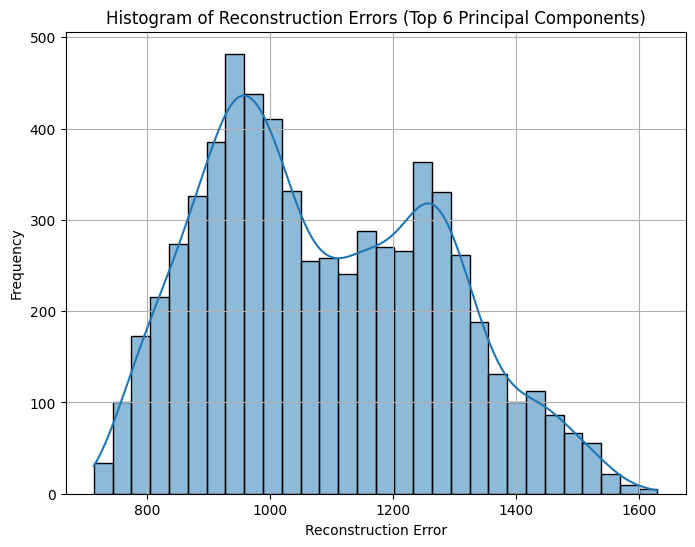

In [ ]:
## Part C

# Apply PCA and keep the top 6 principal components
n_components = 6
datasets_pca = []
for dataset in datasets:
    X_pca, _ = apply_pca(dataset, n_components)
    datasets_pca.append(X_pca)

# Estimate matrix A using the PCA-reduced datasets
A_estimated_pca = estimate_A_pca(datasets_pca)

# Reconstruct data and compute reconstruction errors
errors = []
for dataset, times in zip(datasets, times_list):
    dt = compute_time_steps(times)
    X_pca, pca = apply_pca(dataset, n_components)
    X_t = X_pca[:-1, :]
    X_t1_real = X_pca[1:, :]
    X_t1_pred = predict_next_state_pca(X_t, A_estimated_pca, dt)
    errors.extend(np.linalg.norm(X_t1_pred - X_t1_real, axis=1))

# Plot the histogram of reconstruction errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Histogram of Reconstruction Errors (Top 6 Principal Components)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

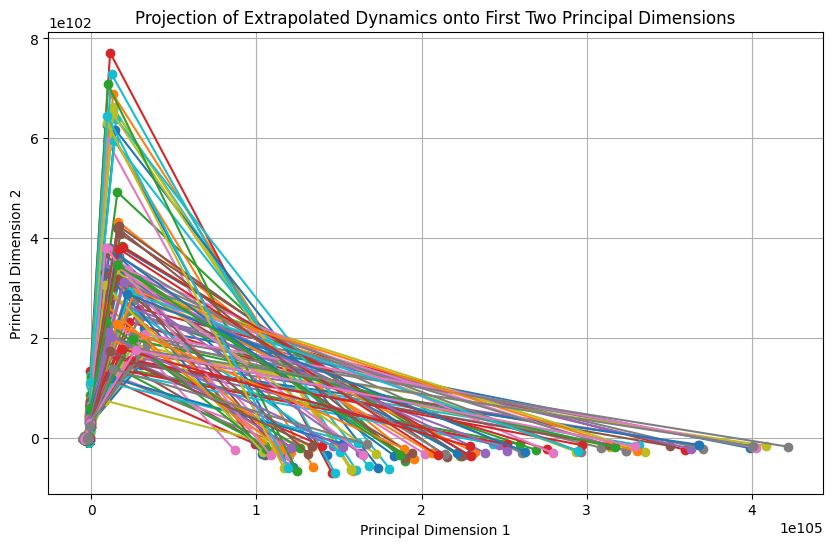

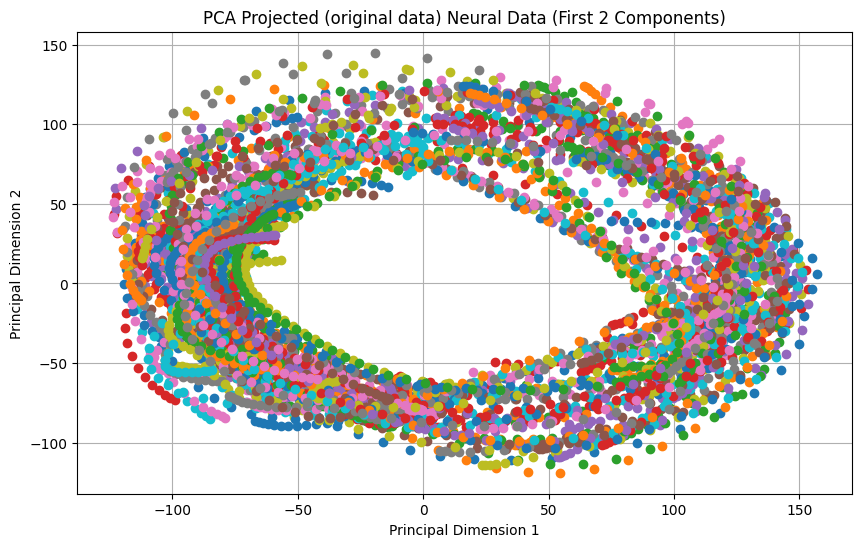

In [ ]:
## Part D

# Apply PCA to each dataset and keep the top 6 principal components
n_components = 6
datasets_pca = []
pca_models = []
for dataset in datasets:
    X_pca, pca = apply_pca(dataset, n_components)
    datasets_pca.append(X_pca)
    pca_models.append(pca)

# Estimate matrix A using the PCA-reduced datasets
A_estimated_pca = estimate_A_pca(datasets_pca)

# Choose one of the first 6 data points and extrapolate dynamics
num_steps = 100  # Number of time steps to extrapolate
dt = compute_time_steps(times_list[0])

trajectories = []
for dataset, X_pca, pca in zip(datasets, datasets_pca, pca_models):
    initial_state = X_pca[0]  # Choosing the first datapoint
    trajectory_pca = extrapolate_dynamics(initial_state, A_estimated_pca, num_steps, dt)
    trajectory_original = pca.inverse_transform(trajectory_pca)
    trajectories.append(trajectory_original)

# Project onto the first two principal dimensions
plt.figure(figsize=(10, 6))
for trajectory in trajectories:
    pca = PCA(n_components=2)
    trajectory_2d = pca.fit_transform(trajectory)
    plt.plot(trajectory_2d[:, 0], trajectory_2d[:, 1], marker='o')

plt.title('Projection of Extrapolated Dynamics onto First Two Principal Dimensions')
plt.xlabel('Principal Dimension 1')
plt.ylabel('Principal Dimension 2')
plt.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for X_pca in datasets_pca:
    pca = PCA(n_components=2)
    X_pca_2d = pca.fit_transform(X_pca)
    ax.plot(X_pca_2d[:, 0], X_pca_2d[:, 1], marker='o', linestyle='')

ax.set_title("PCA Projected (original data) Neural Data (First 2 Components)")
ax.set_xlabel('Principal Dimension 1')
ax.set_ylabel('Principal Dimension 2')
ax.grid(True)
plt.show()


## Observation in part D
The extrapolated projection of PCA in Figure 1 is very linear, which matches the property of PCA of being linear and not capturing rotaional and oscillatory behavior.

The original PCA data in figure 2 looks circular and regularized, matching PCA's property of finding orthogonal axes that maximize the variance in the data. If the data has a roughly uniform distribution, the projections may look circular due to the spread across all principal components.

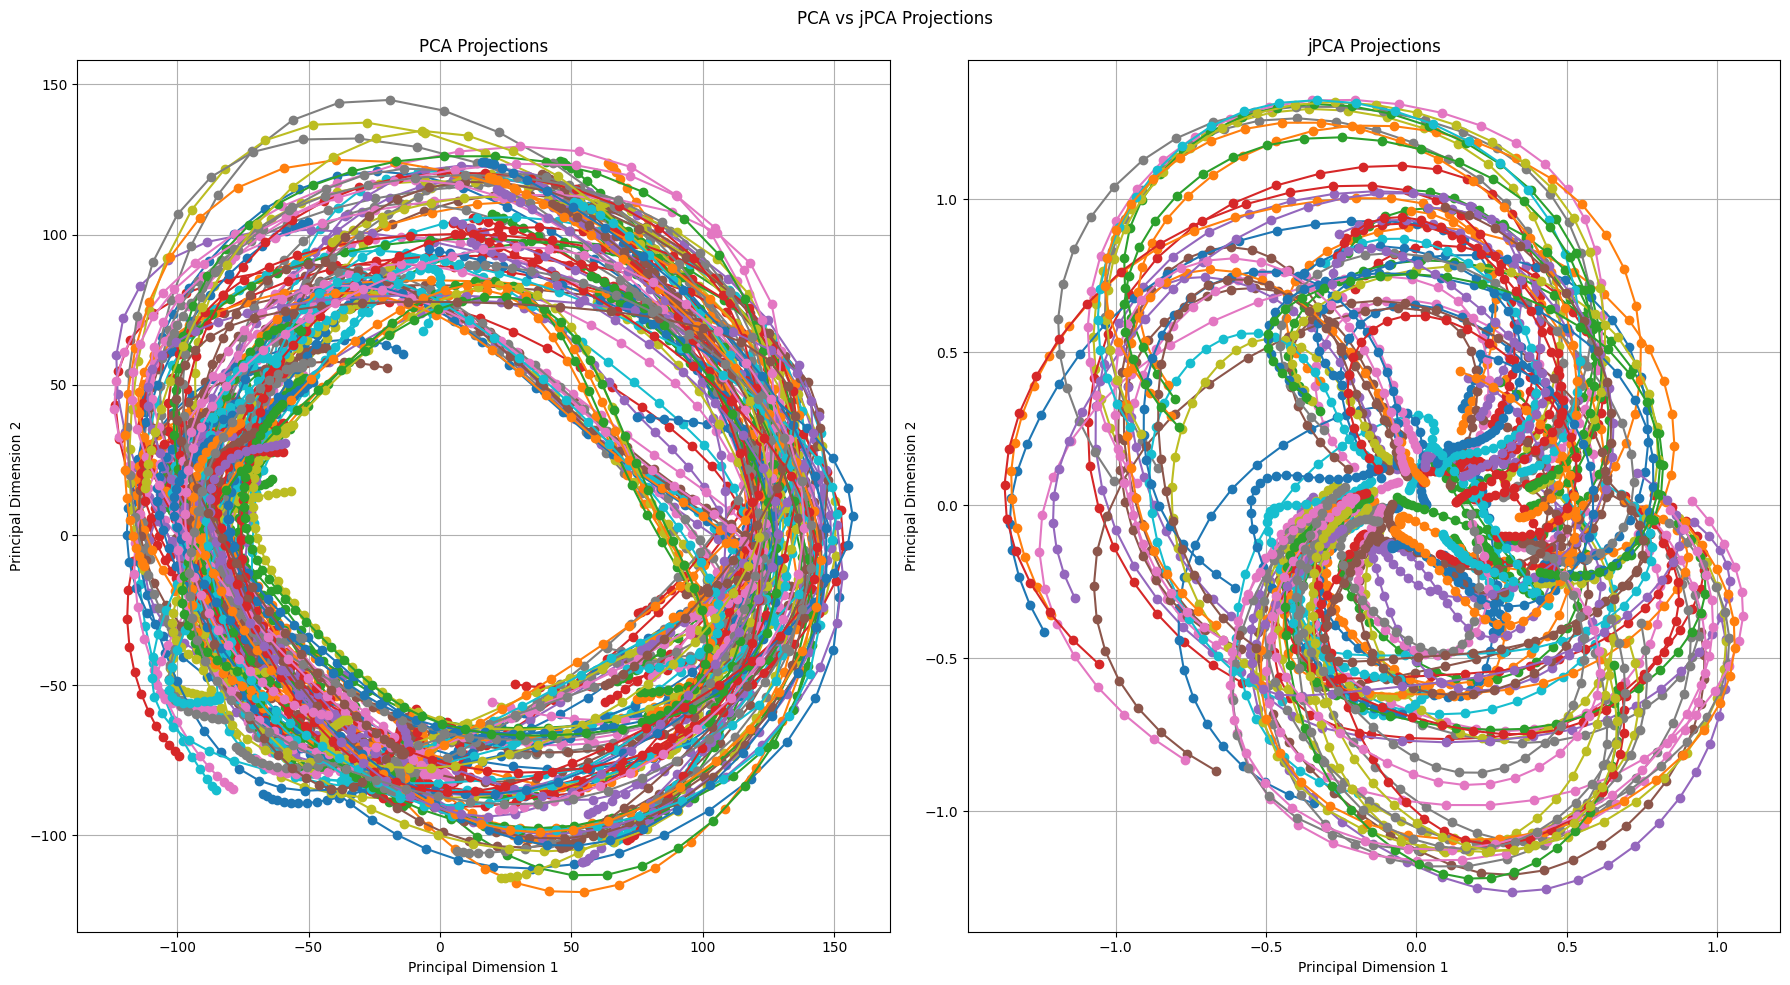

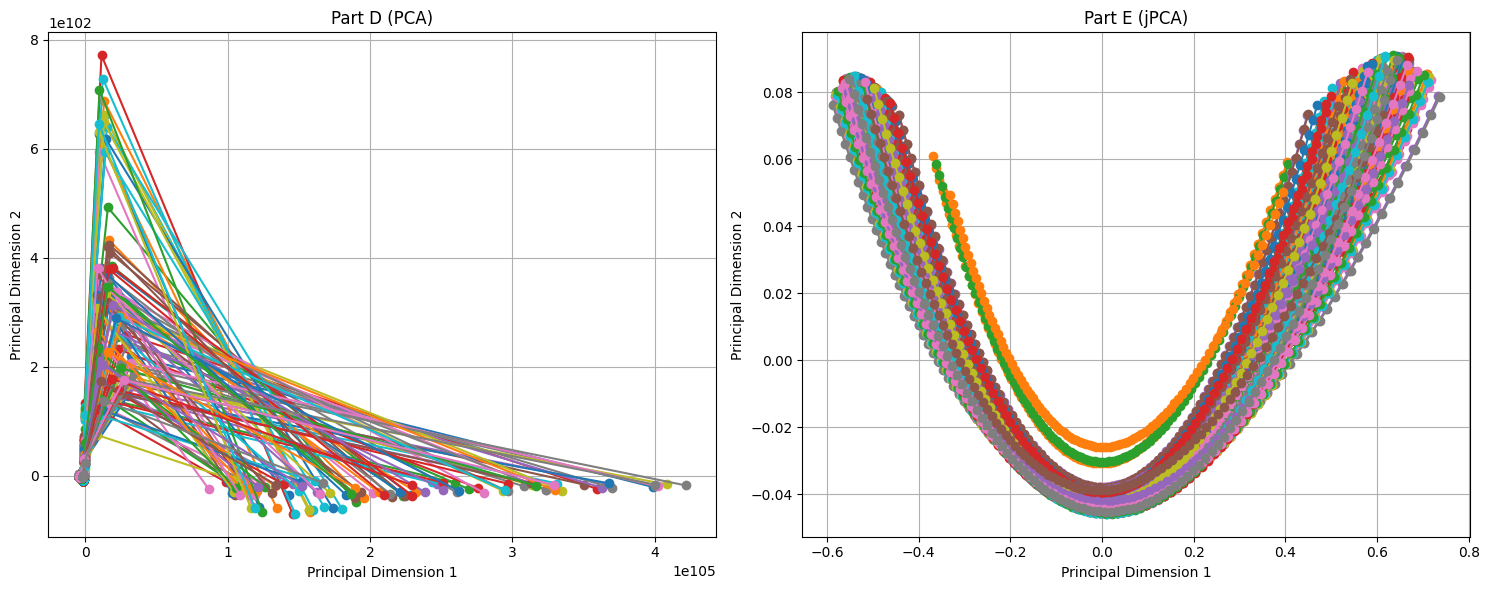

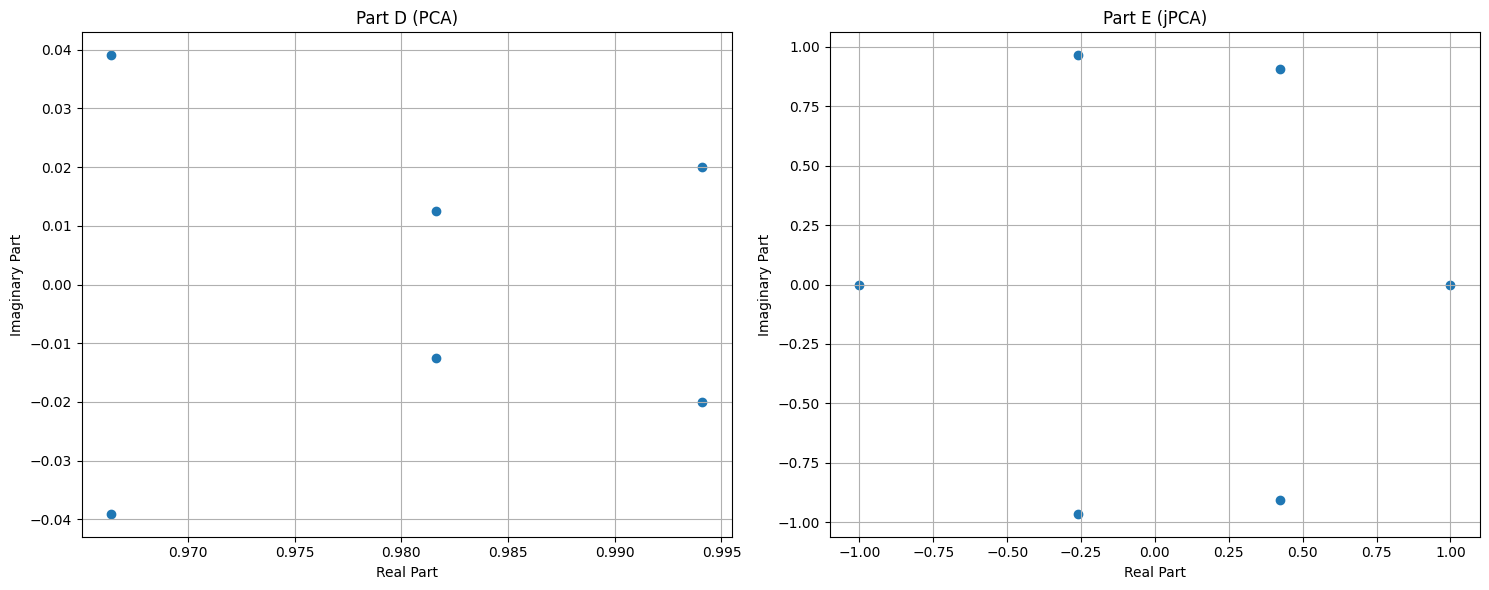

In [ ]:
## Part E

# Load data again
data_path = '/content/drive/MyDrive/exampleData.mat'  # Update this path accordingly
datas, times = load_churchland_data(data_path)

# Rerun the PCA from part C for comparison: Estimating matrix A using PCA
n_components = 6
pca_models = []
datasets_pca = [] #projected neuron trajectories by PCA
for data in datas:
    pca = PCA(n_components=n_components)
    data_centered = data - data.mean(axis=0)
    X_pca = pca.fit_transform(data_centered)
    datasets_pca.append(X_pca)
    pca_models.append(pca)



# Estimate matrix A using the PCA-reduced datasets
A_pca = estimate_A_pca(datasets_pca)


# Extrapolate using PCA dynamics
num_steps = 100
dt = np.mean(np.diff(times))
part_d_trajectories = []
for X_pca, pca in zip(datasets_pca, pca_models):
    initial_state = X_pca[0]  # Choosing the first data point
    trajectory_pca = extrapolate_dynamics(initial_state, A_pca, num_steps, dt)
    trajectory_original = pca.inverse_transform(trajectory_pca)
    part_d_trajectories.append(trajectory_original)

# Run jPCA for Part E
num_jpcs = 6
jpca = jPCA.JPCA(num_jpcs=num_jpcs)
projected, full_data_var, pca_var_capt, jpca_var_capt = jpca.fit(datas, times=times, tstart=-50, tend=300)
A_jpca = jpca.jpcs



# Extrapolate using jPCA dynamics
part_e_trajectories = []
for data, proj in zip(datas, projected):
    initial_state = proj[0]  # Choosing the first data point in the jPCA space
    trajectory_jpca = extrapolate_dynamics_jPCA(initial_state, A_jpca, num_steps, dt)
    part_e_trajectories.append(trajectory_jpca)


## Plot the projection of original data by PCA and jPCA
fig, axes = plt.subplots(1, 2, figsize=(18,10))
plt.suptitle("PCA vs jPCA Projections")

# PCA Projections
axes[0].set_title("PCA Projections")
for proj in datasets_pca:
    axes[0].plot(proj[:, 0], proj[:, 1], marker='o')
axes[0].set_xlabel('Principal Dimension 1')
axes[0].set_ylabel('Principal Dimension 2')
axes[0].grid(True)

# jPCA Projections

axes[1].set_title("jPCA Projections")
for proj in projected:
    axes[1].plot(proj[:, 0], proj[:, 1], marker='o')
axes[1].set_xlabel('Principal Dimension 1')
axes[1].set_ylabel('Principal Dimension 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Compare Part D and Part E extrapolated projections
compare_projections(part_d_trajectories, part_e_trajectories)

# Compare eigenspectra of Part D and Part E, compare real and imaginary distribution
plot_eigenspectra(A_pca, A_jpca.T, 'Part D (PCA)', 'Part E (jPCA)')

## Answer for part E

PCA dynamics mostly describe linear trends and has very little emphasis on rotational behavior
jPCA dynamics recognize loops and spiral patterns and emphasize a lot on rotational behavior or neural activity.

From the projection or original data using PCA and jPCA, the first row of figures, we can see that PCA's figure is more regularized, while jPCA's is more spiral and spreaded out. This is because of the property difference between PCA and jPCA. PCA finds orthogonal axes that capture the most variance in the data, so if the data is somehow uniformly distributed, the shape of PCA will look circular. In jPCA, it identifies rotational dynamics by focusing on joint principal componenst, so the data is more scattered and spread out.
From the second row of extrapolated neural trajectories, obviously only jPCA is able to capture the spiral or oscillatory behavior; PCA's extrapolation is linear, with no curvature at all.

Based on the bottom row of eigenspectra, PCA's eigenspectra has primarily real eigenvalues which indicate linear trends; while jPCA's contain a lot of imaginary components, indicating oscillatory dynamics.
